In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
tpot=pd.read_csv('DatabaseHP/TpotLogC.csv', delimiter = ',')
#import the dataset

In [3]:
df= pd.DataFrame(tpot)
df.describe()

,src_port,ssh.client.proto_version,ssh.server.proto_version,request_time,alert.severity,dest_port,alert.gid
count,42845.000000,33.0,44.0,287.000000,4840.000000,42845.000000,4840.0
mean,50562.378737,2.0,2.0,0.200676,1.161983,1929.812907,1.0
std,15824.913995,0.0,0.0,0.383430,0.438630,7354.319901,0.0
min,23.000000,2.0,2.0,0.000000,1.000000,19.000000,1.0
25%,49828.000000,2.0,2.0,0.010000,1.000000,445.000000,1.0
50%,55022.000000,2.0,2.0,0.037000,1.000000,445.000000,1.0
75%,60013.000000,2.0,2.0,0.241000,1.000000,445.000000,1.0
max,65533.000000,2.0,2.0,2.969000,3.000000,64679.000000,1.0


In [4]:
df.head()
df.columns

Index(['@timestamp', '_id', 'alert.action', 'src_ip', 'src_port',
       'ssh.client.proto_version', 'ssh.server.proto_version',
       'ssh.server.software_version', 't-pot_ip_ext', 'sensor',
       'request_method', 'request_time', 'reason', 'alert.category',
       'alert.severity', 'alert.signature', 'app_proto', 'dest_ip',
       'dest_port', 'eventid', 'event_type', 'geoip.city_name',
       'geoip.country_name', 'type', 'subject', 'smb.response.native_lm',
       'smb.request.native_os', 'smb.request.native_lm', 'smb.command',
       'proto', 'os', 'mod', 'metadata.flowbits', 'link', 'ip_rep', 'in_iface',
       'http_user_agent', 'geoip.timezone', 'geoip.region_name',
       'geoip.region_code', 'geoip.postal_code', 'flow_id', 'dns.type',
       'alert.metadata.deployment', 'alert.gid'],
      dtype='object')

In [5]:
tpot.head()
#the dataset

,@timestamp,_id,alert.action,src_ip,src_port,ssh.client.proto_version,ssh.server.proto_version,ssh.server.software_version,t-pot_ip_ext,sensor,...,in_iface,http_user_agent,geoip.timezone,geoip.region_name,geoip.region_code,geoip.postal_code,flow_id,dns.type,alert.metadata.deployment,alert.gid
0,"May 21st 2020, 07:21:32.224",DvEbNnIBQ6WmAthX0vEE,NaN,78.152.169.153,64145.0,NaN,NaN,NaN,3.21.190.207,NaN,...,eth0,NaN,Europe/Kiev,Khmel'nyts'ka Oblast',68,NaN,"68,34,82,50,60,13,354",NaN,NaN,NaN
1,"May 21st 2020, 07:21:32.152",CPEbNnIBQ6WmAthX0vED,NaN,101.51.236.231,50235.0,NaN,NaN,NaN,3.21.190.207,NaN,...,eth0,NaN,Asia/Bangkok,Changwat Surin,32,NaN,"44,91,72,71,26,58,469",NaN,NaN,NaN
2,"May 21st 2020, 07:21:32.123",CfEbNnIBQ6WmAthX0vED,NaN,172.31.0.2,53.0,NaN,NaN,NaN,3.21.190.207,NaN,...,eth0,NaN,NaN,NaN,NaN,NaN,"1,64,24,64,95,14,59,710",answer,NaN,NaN
3,"May 21st 2020, 07:21:32.122",BfEbNnIBQ6WmAthX0vED,NaN,172.31.22.131,47162.0,NaN,NaN,NaN,3.21.190.207,NaN,...,eth0,NaN,NaN,NaN,NaN,NaN,"1,64,24,64,95,14,59,710",query,NaN,NaN
4,"May 21st 2020, 07:21:32.079",DfEbNnIBQ6WmAthX0vEE,NaN,78.152.169.153,64145.0,NaN,NaN,NaN,3.21.190.207,NaN,...,eth0,NaN,Europe/Kiev,Khmel'nyts'ka Oblast',68,NaN,"68,34,82,50,60,13,354",NaN,NaN,NaN


In [6]:
tpot #orginal database size or file size

,@timestamp,_id,alert.action,src_ip,src_port,ssh.client.proto_version,ssh.server.proto_version,ssh.server.software_version,t-pot_ip_ext,sensor,...,in_iface,http_user_agent,geoip.timezone,geoip.region_name,geoip.region_code,geoip.postal_code,flow_id,dns.type,alert.metadata.deployment,alert.gid
0,"May 21st 2020, 07:21:32.224",DvEbNnIBQ6WmAthX0vEE,NaN,78.152.169.153,64145.0,NaN,NaN,NaN,3.21.190.207,NaN,...,eth0,NaN,Europe/Kiev,Khmel'nyts'ka Oblast',68,NaN,"68,34,82,50,60,13,354",NaN,NaN,NaN
1,"May 21st 2020, 07:21:32.152",CPEbNnIBQ6WmAthX0vED,NaN,101.51.236.231,50235.0,NaN,NaN,NaN,3.21.190.207,NaN,...,eth0,NaN,Asia/Bangkok,Changwat Surin,32,NaN,"44,91,72,71,26,58,469",NaN,NaN,NaN
2,"May 21st 2020, 07:21:32.123",CfEbNnIBQ6WmAthX0vED,NaN,172.31.0.2,53.0,NaN,NaN,NaN,3.21.190.207,NaN,...,eth0,NaN,NaN,NaN,NaN,NaN,"1,64,24,64,95,14,59,710",answer,NaN,NaN
3,"May 21st 2020, 07:21:32.122",BfEbNnIBQ6WmAthX0vED,NaN,172.31.22.131,47162.0,NaN,NaN,NaN,3.21.190.207,NaN,...,eth0,NaN,NaN,NaN,NaN,NaN,"1,64,24,64,95,14,59,710",query,NaN,NaN
4,"May 21st 2020, 07:21:32.079",DfEbNnIBQ6WmAthX0vEE,NaN,78.152.169.153,64145.0,NaN,NaN,NaN,3.21.190.207,NaN,...,eth0,NaN,Europe/Kiev,Khmel'nyts'ka Oblast',68,NaN,"68,34,82,50,60,13,354",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43276,"May 21st 2020, 04:09:52.000",FSVsNXIBg6mF2jJlWvxf,NaN,210.18.189.3,51400.0,NaN,NaN,NaN,18.221.209.151,NaN,...,NaN,NaN,Asia/Kolkata,Tamil Nadu,TN,NaN,NaN,NaN,NaN,NaN
43277,"May 21st 2020, 04:09:52.000",GSVsNXIBg6mF2jJlWvxf,NaN,210.18.189.3,51400.0,NaN,NaN,NaN,18.221.209.151,NaN,...,NaN,NaN,Asia/Kolkata,Tamil Nadu,TN,NaN,NaN,NaN,NaN,NaN
43278,"May 21st 2020, 04:09:52.000",FCVsNXIBg6mF2jJlWvxf,NaN,171.236.68.137,25648.0,NaN,NaN,NaN,18.221.209.151,NaN,...,NaN,NaN,Asia/Ho_Chi_Minh,Thanh Pho Ha Noi,HN,NaN,NaN,NaN,NaN,NaN
43279,"May 21st 2020, 04:09:52.000",OyVsNXIBg6mF2jJlXvxJ,NaN,210.18.189.3,51676.0,NaN,NaN,NaN,18.221.209.151,NaN,...,NaN,NaN,Asia/Kolkata,Tamil Nadu,TN,NaN,NaN,NaN,NaN,NaN


In [7]:
tpot['type'].value_counts()[:10] #top 10 honeypot services that logged n number of attacks

P0f          23796
Suricata     14625
Dionaea       4292
NGINX          287
Cowrie         168
Honeytrap      102
Rdpy             9
Tanner           1
Ciscoasa         1
Name: type, dtype: int64

In [8]:
tpot['src_ip'].value_counts()[:10] #Top 10 Source IP

184.82.167.253     7235
101.51.236.231     6971
210.18.189.3       6142
172.31.22.131      4063
78.152.169.153     3133
171.236.68.137     3093
165.169.13.10      2170
176.118.217.242    1608
93.80.60.111       1369
113.22.100.9       1318
Name: src_ip, dtype: int64

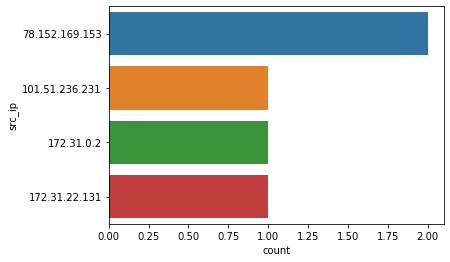

In [9]:
p = sns.countplot(data=tpot.head(), y = 'src_ip')
plt.rc('figure', figsize=(5,5))

In [11]:
tpot['alert.category'].value_counts()[:10] #Top 10 alert categories or attack types

Attempted Administrator Privilege Gain    4186
Attempted Information Leak                 228
Misc Attack                                190
Potentially Bad Traffic                     88
Misc activity                               61
Generic Protocol Command Decode             58
Not Suspicious Traffic                      18
A Network Trojan was detected                6
Attempted Denial of Service                  3
Potential Corporate Privacy Violation        1
Name: alert.category, dtype: int64

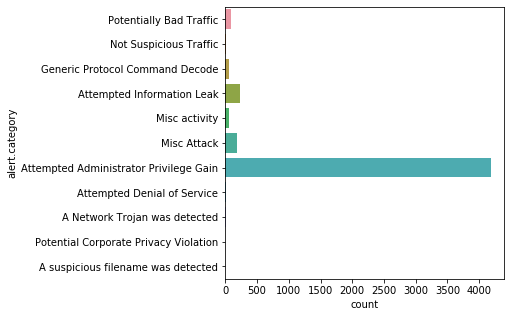

In [12]:
p = sns.countplot(data=tpot, y = 'alert.category')
plt.rc('figure', figsize=(8,5))

In [13]:
tpot['dest_ip'].value_counts()[:10] #top 10 targeted destination IPs 

172.31.22.131      38752
160.44.201.156      3325
172.31.0.2           682
172.23.0.2            36
185.209.0.143         20
191.19.23.155         19
89.144.47.57           4
185.153.196.243        4
217.64.111.6           4
205.185.123.189        2
Name: dest_ip, dtype: int64

In [14]:
tpot['alert.signature'].value_counts()[:10] #top 10 attack signatures

ET EXPLOIT [PTsecurity] DoublePulsar Backdoor installation communication                                    4180
ET SCAN NMAP -sS window 1024                                                                                 127
ET INFO User-Agent (python-requests) Inbound to Webserver                                                     70
ET DROP Dshield Block Listed Source group 1                                                                   65
GPL DNS SPOOF query response with TTL of 1 min. and no authority                                              49
ET SCAN Potential SSH Scan                                                                                    29
ET SCAN Suspicious inbound to MSSQL port 1433                                                                 21
ET POLICY RDP connection request                                                                              16
GPL ICMP_INFO Destination Unreachable Communication with Destination Host is Administratively Pr

In [15]:
tpot['alert.severity'].value_counts()[:10] #severity levels of attack

1.0    4193
2.0     510
3.0     137
Name: alert.severity, dtype: int64

In [16]:
tpot['alert.metadata.deployment'].value_counts()[:10]

["Internet"]      4180
["Perimeter"]      207
["Datacenter"]       3
["Internal"]         3
Name: alert.metadata.deployment, dtype: int64

In [17]:
tpot['reason'].value_counts()[:10] #top 10 reasons

ttl                              208
ttl port                         127
sig_diff x_known ttl mtu          12
sig_diff x_known port mtu         11
sig_diff x_known ttl port mtu     10
port                              10
sig_diff x_known mtu               9
os_diff port                       7
tstamp port                        2
os_diff                            2
Name: reason, dtype: int64

In [18]:
tpot['event_type'].value_counts()

smb         8287
alert       4840
dns         1350
http          88
ssh           27
rdp           16
tls           11
fileinfo       3
anomaly        3
Name: event_type, dtype: int64

In [19]:
tpot['proto'].value_counts() #protocols

TCP     13188
UDP      1421
ICMP       16
Name: proto, dtype: int64

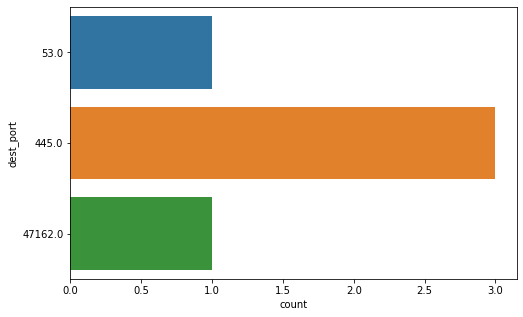

In [20]:
p = sns.countplot(data=tpot.head(), y = 'dest_port')
plt.rc('figure', figsize=(8,8)) #the attacked ports

In [21]:
tpot['os'].value_counts() #top 10 OS

???                                5396
Windows 7 or 8                     4443
Linux 2.2.x-3.x                     845
Linux 3.x                           666
Linux 3.11 and newer                124
Linux 2.2.x-3.x (barebone)           35
Windows NT kernel                    21
Linux 3.1-3.10                       20
Windows XP                            6
Linux 2.2.x-3.x (no timestamps)       6
Linux 2.0                             1
Linux 2.4.x                           1
Linux 2.4.x-2.6.x                     1
Name: os, dtype: int64

In [22]:
tpot['geoip.country_name'].value_counts()[:10] #top 10 Countries

Thailand          14346
India              6511
Vietnam            4726
Russia             3278
Ukraine            3141
Réunion            2170
China              1515
United States      1431
United Kingdom      162
Netherlands         145
Name: geoip.country_name, dtype: int64

In [23]:
tpot['geoip.city_name'].value_counts()[:10] 
#top 10 Cities

Surin           6971
Chennai         6142
Hanoi           4722
Khmelnytskyi    3133
Ryazan          1608
Moscow          1369
Buffalo          769
Zhengzhou        637
Guiyang          393
Mumbai           351
Name: geoip.city_name, dtype: int64

In [24]:
tpot['app_proto'].value_counts() 
#targeted application protocols

smb       4213
http        78
dns         71
rdp         33
ssh         17
failed       5
Name: app_proto, dtype: int64

In [25]:
tpot.groupby(['alert.signature','geoip.country_name']).src_ip.value_counts().nlargest(10) 
#attack signatures from respective countries and src_ip

alert.signature                                                           geoip.country_name  src_ip         
ET EXPLOIT [PTsecurity] DoublePulsar Backdoor installation communication  Russia              176.118.217.242    1573
                                                                                              93.80.60.111       1329
                                                                          Vietnam             113.22.100.9       1278
ET INFO User-Agent (python-requests) Inbound to Webserver                 United States       192.3.67.106         25
                                                                                              23.95.226.155        17
ET SCAN NMAP -sS window 1024                                              United Kingdom      51.161.13.149        11
ET INFO User-Agent (python-requests) Inbound to Webserver                 United States       167.99.190.39        10
ET POLICY RDP connection request                                

In [26]:
tpot.groupby(['src_ip','geoip.country_name']).dest_ip.value_counts().nlargest(10) 
#targeted destination ip from respective source ips

src_ip           geoip.country_name  dest_ip      
184.82.167.253   Thailand            172.31.22.131    7235
101.51.236.231   Thailand            172.31.22.131    6971
210.18.189.3     India               172.31.22.131    6142
78.152.169.153   Ukraine             172.31.22.131    3133
171.236.68.137   Vietnam             172.31.22.131    3093
165.169.13.10    Réunion             172.31.22.131    2170
176.118.217.242  Russia              172.31.22.131    1608
93.80.60.111     Russia              172.31.22.131    1369
113.22.100.9     Vietnam             172.31.22.131    1318
222.85.111.159   China               172.31.22.131     637
Name: dest_ip, dtype: int64

In [27]:
tpot.groupby(['src_ip','geoip.country_name']).os.value_counts().nlargest(20)
#operating systems (os) detected from respective countries ip. Here ??? means unidentified os

src_ip          geoip.country_name  os             
184.82.167.253  Thailand            ???                1032
                                    Windows 7 or 8     1031
101.51.236.231  Thailand            ???                1001
                                    Windows 7 or 8     1001
210.18.189.3    India               ???                 877
                                    Windows 7 or 8      877
78.152.169.153  Ukraine             ???                 454
                                    Windows 7 or 8      454
171.236.68.137  Vietnam             ???                 413
                                    Windows 7 or 8      413
165.169.13.10   Réunion             Windows 7 or 8      330
                                    ???                 300
222.85.111.159  China               Windows 7 or 8      103
                                    ???                  85
1.206.76.68     China               Windows 7 or 8       76
                                    ???         

In [28]:
tpot['smb.command'].value_counts()[:10]
#top smb commands

SMB1_COMMAND_NEGOTIATE_PROTOCOL    4069
SMB1_COMMAND_SESSION_SETUP_ANDX    4059
SMB1_COMMAND_TRANS2_SECONDARY       128
SMB1_COMMAND_TREE_CONNECT_ANDX       17
SMB1_COMMAND_ECHO                    16
SMB1_COMMAND_NT_TRANS                 8
Name: smb.command, dtype: int64

In [29]:
tpot['dns.type'].value_counts()

query     675
answer    675
Name: dns.type, dtype: int64

In [31]:
tpot.groupby(['geoip.postal_code','geoip.country_name','geoip.city_name']).src_ip.value_counts().nlargest(10)

geoip.postal_code  geoip.country_name  geoip.city_name  src_ip         
390005             Russia              Ryazan           176.118.217.242    1608
101194             Russia              Moscow           93.80.60.111       1369
14202              United States       Buffalo          192.3.67.106        303
                                                        23.95.226.155       203
89101              United States       Las Vegas        209.141.40.12       190
14202              United States       Buffalo          107.175.197.161     140
76104              United States       Fort Worth       167.99.190.39       105
14202              United States       Buffalo          107.172.141.143      86
10013              United States       New York         159.89.83.165        66
315400             Romania             Lipova           89.34.27.103         46
Name: src_ip, dtype: int64

In [32]:
tpot.groupby(['alert.category','geoip.country_name','geoip.city_name']).src_ip.value_counts().nlargest(10)
#attacker profiling with respect to src ip

alert.category                          geoip.country_name  geoip.city_name  src_ip         
Attempted Administrator Privilege Gain  Russia              Ryazan           176.118.217.242    1573
                                                            Moscow           93.80.60.111       1329
                                        Vietnam             Hanoi            113.22.100.9       1278
Attempted Information Leak              United States       Buffalo          192.3.67.106         25
                                                                             23.95.226.155        17
                                                            Fort Worth       167.99.190.39        10
                                                            Buffalo          107.175.197.161       6
Potentially Bad Traffic                 China               Guiyang          1.206.76.68           6
Attempted Information Leak              Netherlands         Amsterdam        94.102.51.28          